<a href="https://colab.research.google.com/github/ManisMalakar/Convolutional-Neural-Network-/blob/main/Credit_Card_Fraud_Detection_from_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#Importing the dataset from Kaggle
!pip install Kaggle

In [69]:
#Create a directory as kaggle
!mkdir ~p ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [70]:
#Importing kaggle API
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle (1).json


In [71]:
#Copying the API ket to kaggle directory
!cp kaggle.json ~/.kaggle

In [72]:
#Disable API key
!chmod 600 /root/.kaggle/kaggle.json

In [73]:
#Importing the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud


creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [74]:
#Unzipping the dataset
!unzip /content/creditcardfraud.zip


Archive:  /content/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [75]:
dataset_1=pd.read_csv('/content/creditcard.csv')

In [76]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [77]:
#Data Preprocessing
dataset_1.shape

(284807, 31)

In [78]:
#Checking the null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [79]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [80]:
#Observation in each of the classes
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [81]:
#Balancing the dataset
fraud=dataset_1[dataset_1['Class']==1]
non_fraud=dataset_1[dataset_1['Class']==0]

In [82]:
fraud.shape,non_fraud.shape

((492, 31), (284315, 31))

In [83]:
#Selection of random samples
non_fraud_t=non_fraud.sample(n=492)

In [84]:
non_fraud_t.shape

(492, 31)

In [85]:
#Merging the dataset
dataset=fraud.append(non_fraud_t,ignore_index=True)
print(dataset)

         Time        V1        V2        V3  ...       V27       V28   Amount  Class
0       406.0 -2.312227  1.951992 -1.609851  ...  0.261145 -0.143276     0.00      1
1       472.0 -3.043541 -3.157307  1.088463  ... -0.252773  0.035764   529.00      1
2      4462.0 -2.303350  1.759247 -0.359745  ...  0.039566 -0.153029   239.93      1
3      6986.0 -4.397974  1.358367 -2.592844  ... -0.827136  0.849573    59.00      1
4      7519.0  1.234235  3.019740 -4.304597  ... -0.010016  0.146793     1.00      1
..        ...       ...       ...       ...  ...       ...       ...      ...    ...
979  169832.0 -0.530672  0.585750  1.399982  ...  0.133932  0.167789    49.99      0
980   73043.0  0.982889 -0.136366  0.002605  ... -0.075444  0.014436   109.95      0
981    2441.0 -1.286740  1.207801  1.295946  ...  0.029386 -0.049569    17.15      0
982   26351.0  1.100842 -0.674754  1.291698  ...  0.125553  0.029354    24.49      0
983   87880.0 -2.666750 -5.001975 -0.050748  ... -0.447175  0.029

In [86]:
#matrix of features
x=dataset.drop(labels=['Class'],axis=1)

#Dependent variable
y=dataset['Class']

x.shape,y.shape

((984, 30), (984,))

In [87]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,x_test.shape

((787, 30), (197, 30))

In [88]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [89]:
x_train

array([[-3.96849765e-01,  2.93680865e-01, -3.26537668e-01, ...,
        -7.28903966e-02,  1.79686854e-01, -4.13415381e-01],
       [-7.98483060e-01,  5.07749753e-01, -9.46464632e-02, ...,
         4.81529580e-01,  5.97918241e-01, -4.75599869e-01],
       [-8.35375178e-01,  1.86288723e-01,  1.03252520e-01, ...,
         3.18390600e-01,  4.42416094e-01, -4.74500070e-01],
       ...,
       [-5.50594649e-01,  6.72097676e-01, -4.31561165e-01, ...,
        -1.00892355e-01, -8.76539345e-02, -4.54107957e-01],
       [-2.20645192e-01,  3.87906995e-01, -4.35555992e-01, ...,
         3.62367449e-02,  1.16092082e-04, -4.42789189e-01],
       [ 1.66592703e+00,  4.69406233e-01, -2.20202208e-01, ...,
         1.19645550e-01,  7.27948511e-02, -4.62631402e-01]])

In [90]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [91]:
x_train.shape,x_test.shape

((787, 30), (197, 30))

In [92]:
#Reshape the dataset
x_train=x_train.reshape(787,30,1)
x_test=x_test.reshape(197,30,1)

In [93]:
#Building the model

model=tf.keras.models.Sequential()

#Adding the first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(30,1)))

#Adding the normalization 
model.add(tf.keras.layers.BatchNormalization())

#Adding the maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.2))



In [94]:
#Adding the second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=2,padding='same',activation='relu'))

#Adding the normalization 
model.add(tf.keras.layers.BatchNormalization())

#Adding the maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Flattening the layer
model.add(tf.keras.layers.Flatten())

#Ading the first dense layer
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Output Layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [95]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 30, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 7, 64)            

In [96]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [97]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
history=model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
25/25 [==============================] - 1s 16ms/step - loss: 0.8809 - accuracy: 0.5412 - val_loss: 0.6783 - val_accuracy: 0.5635
Epoch 2/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6406 - accuracy: 0.6955 - val_loss: 0.6567 - val_accuracy: 0.6954
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.5230 - accuracy: 0.7517 - val_loss: 0.6362 - val_accuracy: 0.7360
Epoch 4/25
25/25 [==============================] - 0s 12ms/step - loss: 0.4443 - accuracy: 0.8047 - val_loss: 0.6085 - val_accuracy: 0.7462
Epoch 5/25
25/25 [==============================] - 0s 7ms/step - loss: 0.4044 - accuracy: 0.8333 - val_loss: 0.5797 - val_accuracy: 0.7462
Epoch 6/25
25/25 [==============================] - 0s 8ms/step - loss: 0.3464 - accuracy: 0.8652 - val_loss: 0.5502 - val_accuracy: 0.7614
Epoch 7/25
25/25 [==============================] - 0s 12ms/step - loss: 0.2904 - accuracy: 0.8839 - val_loss: 0.5179 - val_accuracy: 0.7665
Epoch 8/25
25/25 

In [99]:
# Model predictions
y_pred = model.predict_classes(x_test)

print(y_pred[12]), print(y_test[12])


[1]
1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(None, None)

In [100]:
# The confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   1]
 [ 10  81]]


In [101]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)


0.9441624365482234


In [102]:
#The Learning Curve
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

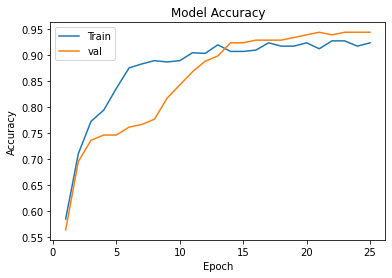

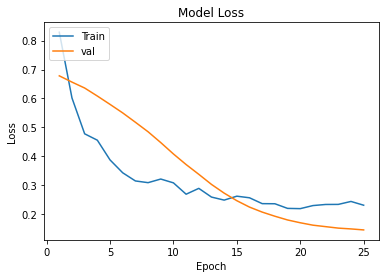

In [103]:
learning_curve(history, 25)